In [12]:
import numpy as np
from matplotlib import pyplot as plt
import math
import planet_sampler_pop as ps
import pandas as pd
from scipy import stats  
import scipy.optimize as opt
%matplotlib inline

### Loading the data

In [13]:
weiss_data = pd.read_csv("weiss_tables.csv")
#life_planets = ps.PlanetSample("emile_testing_AG13_bright5_weiss.txt", dataset = "SAG")
life_planets = ps.PlanetSample("kerneltest_SAG13_bright5_weiss.txt", dataset = "SAG")


In [14]:
periods_plus = []
periods_minus = []
nMC = 5
for i in range(nMC):    
    for snumber in range(326):
        periods = np.sort(life_planets.period[np.logical_and(life_planets.snumber == snumber, life_planets.nMC == i)])
        if(len(periods) > 2): # If there are more than 2 planets in the system
            #print("Simulation " + str(i)) 
           # print("max : " + str(max(periods_temp)) + ", min : " + str(min(periods_temp)))
            #as_temp = a[a.argsort()]
            periods_temp_plus = periods[2:]/(periods[1:-1])
            periods_temp_minus = periods[1:-1]/periods[0:-2]
            periods_plus.append(periods_temp_plus)
            periods_minus.append(periods_temp_minus)
        else:
            pass
        #print("This system does not have enough planets in simulation " + str(i))
periods_plus_life = np.concatenate(np.array(periods_plus))
periods_minus_life = np.concatenate(np.array(periods_minus))

In [15]:
periods_ratio = []
for star in weiss_data.KOIS.unique():
    periods = np.array(weiss_data.planet_period[weiss_data.KOIS == star].sort_values())
    if(len(periods) >= 3):
        periods_ratio.append(periods[1:]/periods[:-1])
periods_ratio = np.concatenate(periods_ratio)

In [16]:
len(periods_ratio)

328

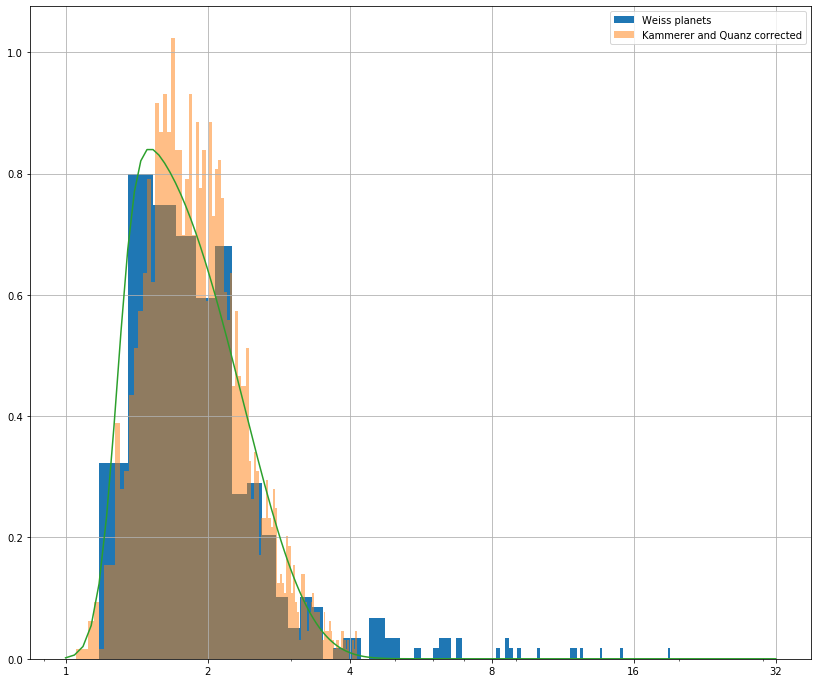

In [17]:
def skew_gaus(x, mean, skew, sigma):
    return stats.skewnorm.pdf(x, skew, mean, sigma)

plt.figure(figsize = (14,12))
entries, bin_edges, patches = plt.hist(periods_ratio, bins = 100, density = True, label = "Weiss planets")
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.hist(periods_plus_life, density = True, bins = 100, alpha = 0.5, label = "Kammerer and Quanz corrected")
popt, pcov = opt.curve_fit(skew_gaus, bin_middles, entries, p0 = [1.5, 10, 3.5])
lsp = np.linspace(1,32,700)
#plt.plot(lsp, stats.skewnorm.pdf(lsp, 4.5, 1.2, 1))
plt.plot(lsp, skew_gaus(lsp, popt[0], popt[1], popt[2]))
plt.xscale("log")
plt.xticks([1,2,4,8,16,32], [1,2,4,8,16,32])
plt.grid()
plt.legend()